In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from PIL import Image

import modules.images.utils as im

In [23]:
# J'aimerais savoir la taille des images de notre jeu de données.
taille_image = cv2.imread("./data/test/apple/0001.png")
taille_image.shape

(32, 32, 3)

In [24]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

TRAIN_DATA_DIR = './data/train'
TRAIN_IMAGE_SIZE = 32
TRAIN_BATCH_SIZE = 32

train_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training')
    
validation_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

Found 2800 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [25]:
model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='elu', kernel_initializer='he_uniform', padding='same', input_shape=(taille_image.shape)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32, activation='elu'))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(64, activation='elu'))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.2))


model.add(Conv2D(128, kernel_size=5, activation='elu', kernel_initializer='he_uniform', padding='same'))
model.add(Dense(256, activation='elu'))

#Toujours à la fin
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dense_10 (Dense)             (None, 16, 16, 32)        544       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dense_11 (Dense)             (None, 8, 8, 64)         

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# es_callback = EarlyStopping(monitor='val_loss', patience=3)
# A rajouter en parametre dans model.fit_generator : callbacks=[es_callback]

training = model.fit_generator(train_generator, epochs=30, validation_data=validation_generator, shuffle=False)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 88 steps, validate for 22 steps
Epoch 1/30
88/88 [==============================] - 38s 429ms/step - loss: 4.0634 - accuracy: 0.3043 - val_loss: 1.7095 - val_accuracy: 0.3457
Epoch 2/30
88/88 [==============================] - 33s 378ms/step - loss: 1.4856 - accuracy: 0.4464 - val_loss: 1.8668 - val_accuracy: 0.3343
Epoch 3/30
88/88 [==============================] - 32s 368ms/step - loss: 1.3871 - accuracy: 0.4764 - val_loss: 1.5888 - val_accuracy: 0.3914
Epoch 4/30
88/88 [==============================] - 32s 364ms/step - loss: 1.2635 - accuracy: 0.5207 - val_loss: 1.5301 - val_accuracy: 0.4143
Epoch 5/30
88/88 [==============================] - 31s 358ms/step - loss: 1.1939 - accuracy: 0.5450 - val_loss: 1.7278 - val_accuracy: 0.4100
Epoch 6/30
88/88 [==============================] - 33s 370ms/step - loss: 1.1285 - accuracy: 0.5757 - val_loss: 1.4251 - val_accuracy: 0.4886
Epoch 7/30
88/88 [==============================] 

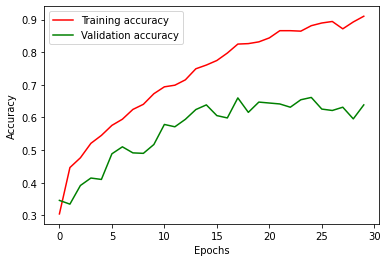

In [27]:
plt.plot(training.history['accuracy'], color='red', label='Training accuracy')
plt.plot(training.history['val_accuracy'],  color='green', label='Validation accuracy')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

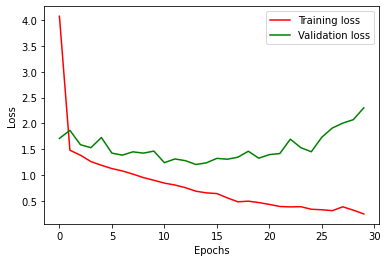

In [28]:
plt.plot(training.history['loss'], color='red', label='Training loss')
plt.plot(training.history['val_loss'],  color='green', label='Validation loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [29]:
layer_outputs = [layer.output for layer in model.layers]

test_image = "./data/test/bear/0001.png"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32,3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='plasma')
            activation_index += 1

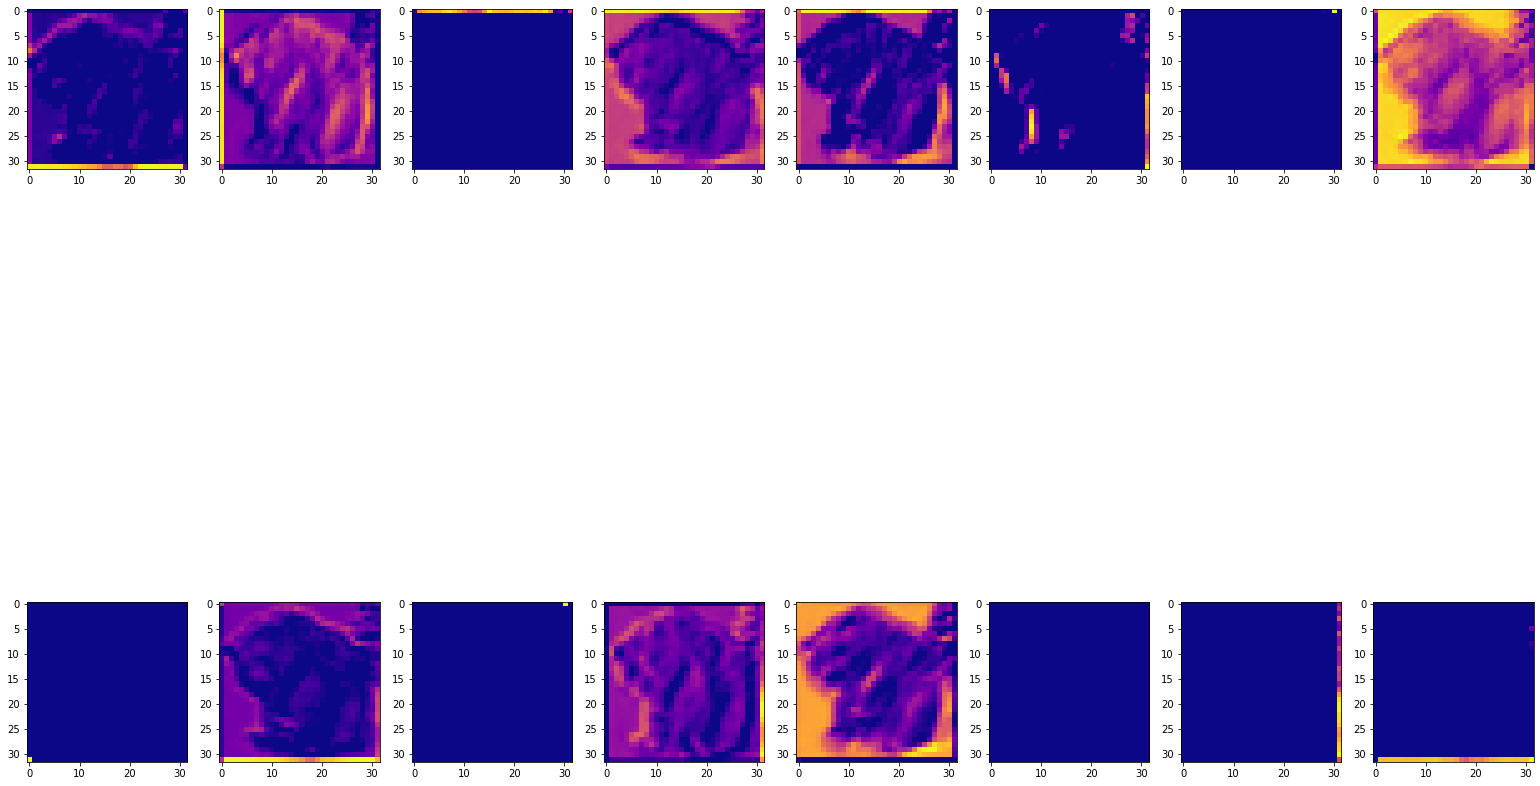

In [30]:
display_activation(activations, 8, 2, 0) # 1ère convolution

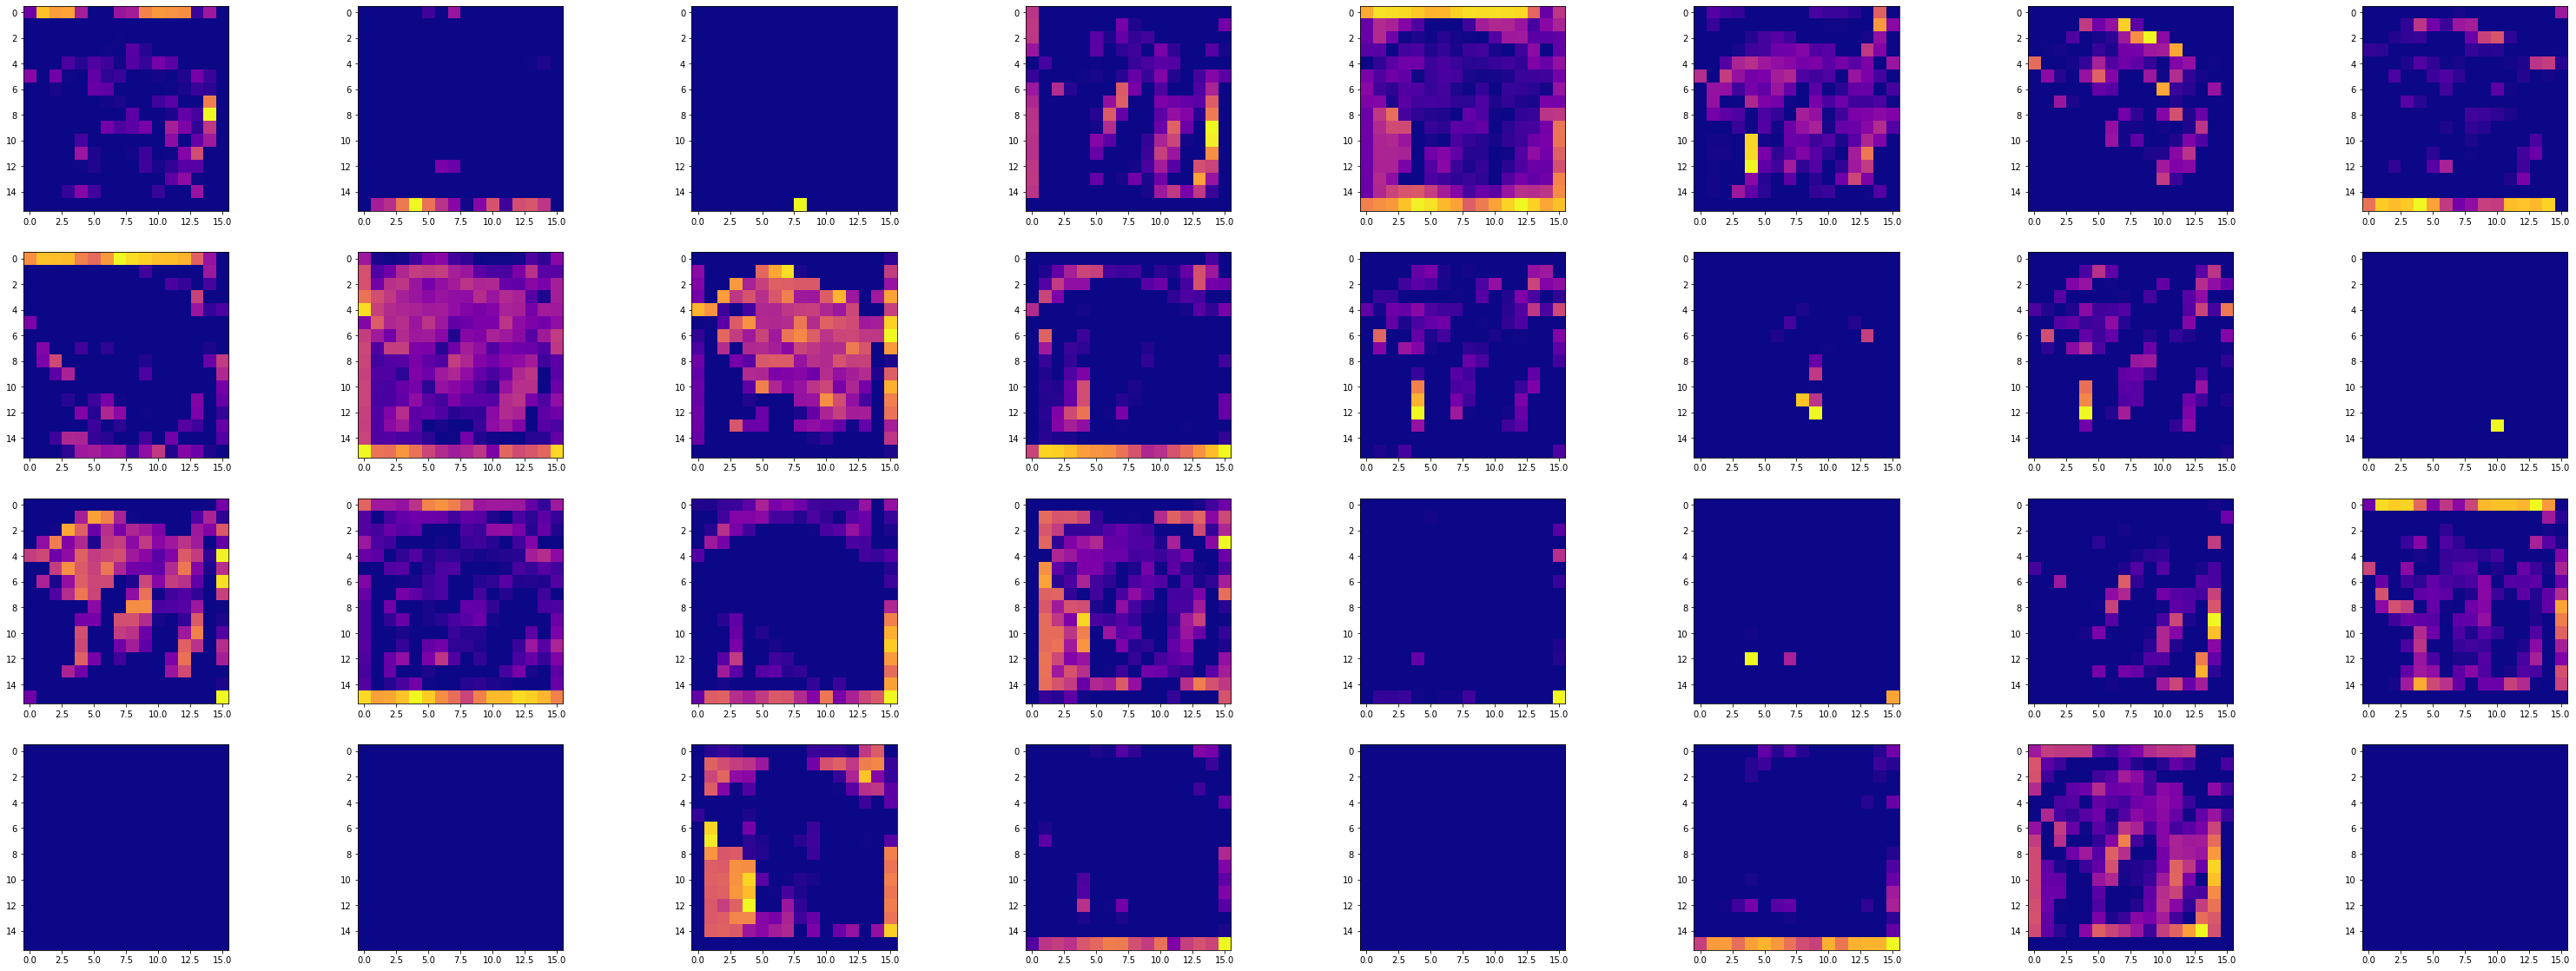

In [31]:
display_activation(activations, 8, 4, 3) # 2ème convolution

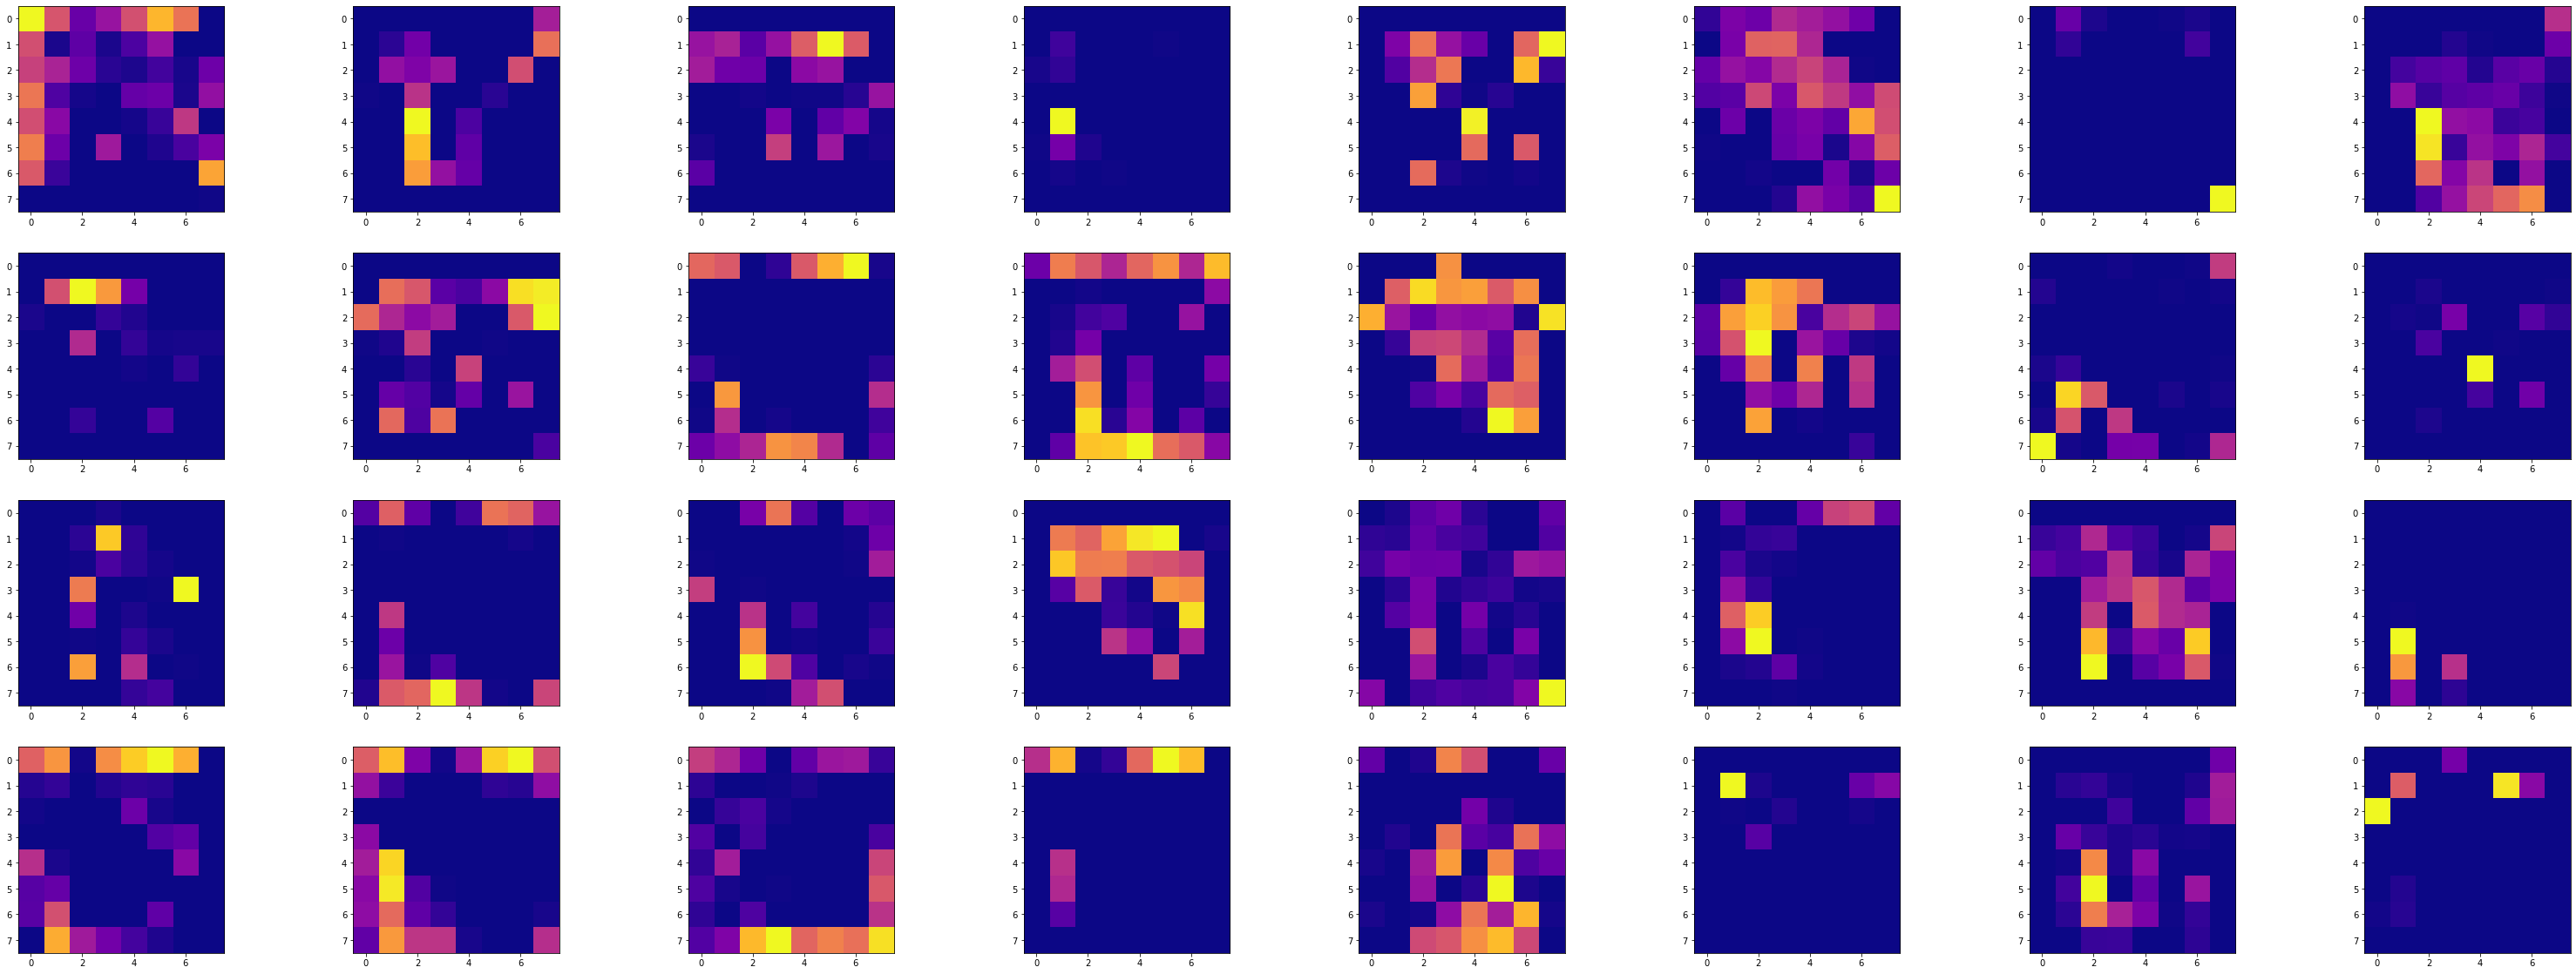

In [32]:
display_activation(activations, 8, 4, 7) # 3ème convolution

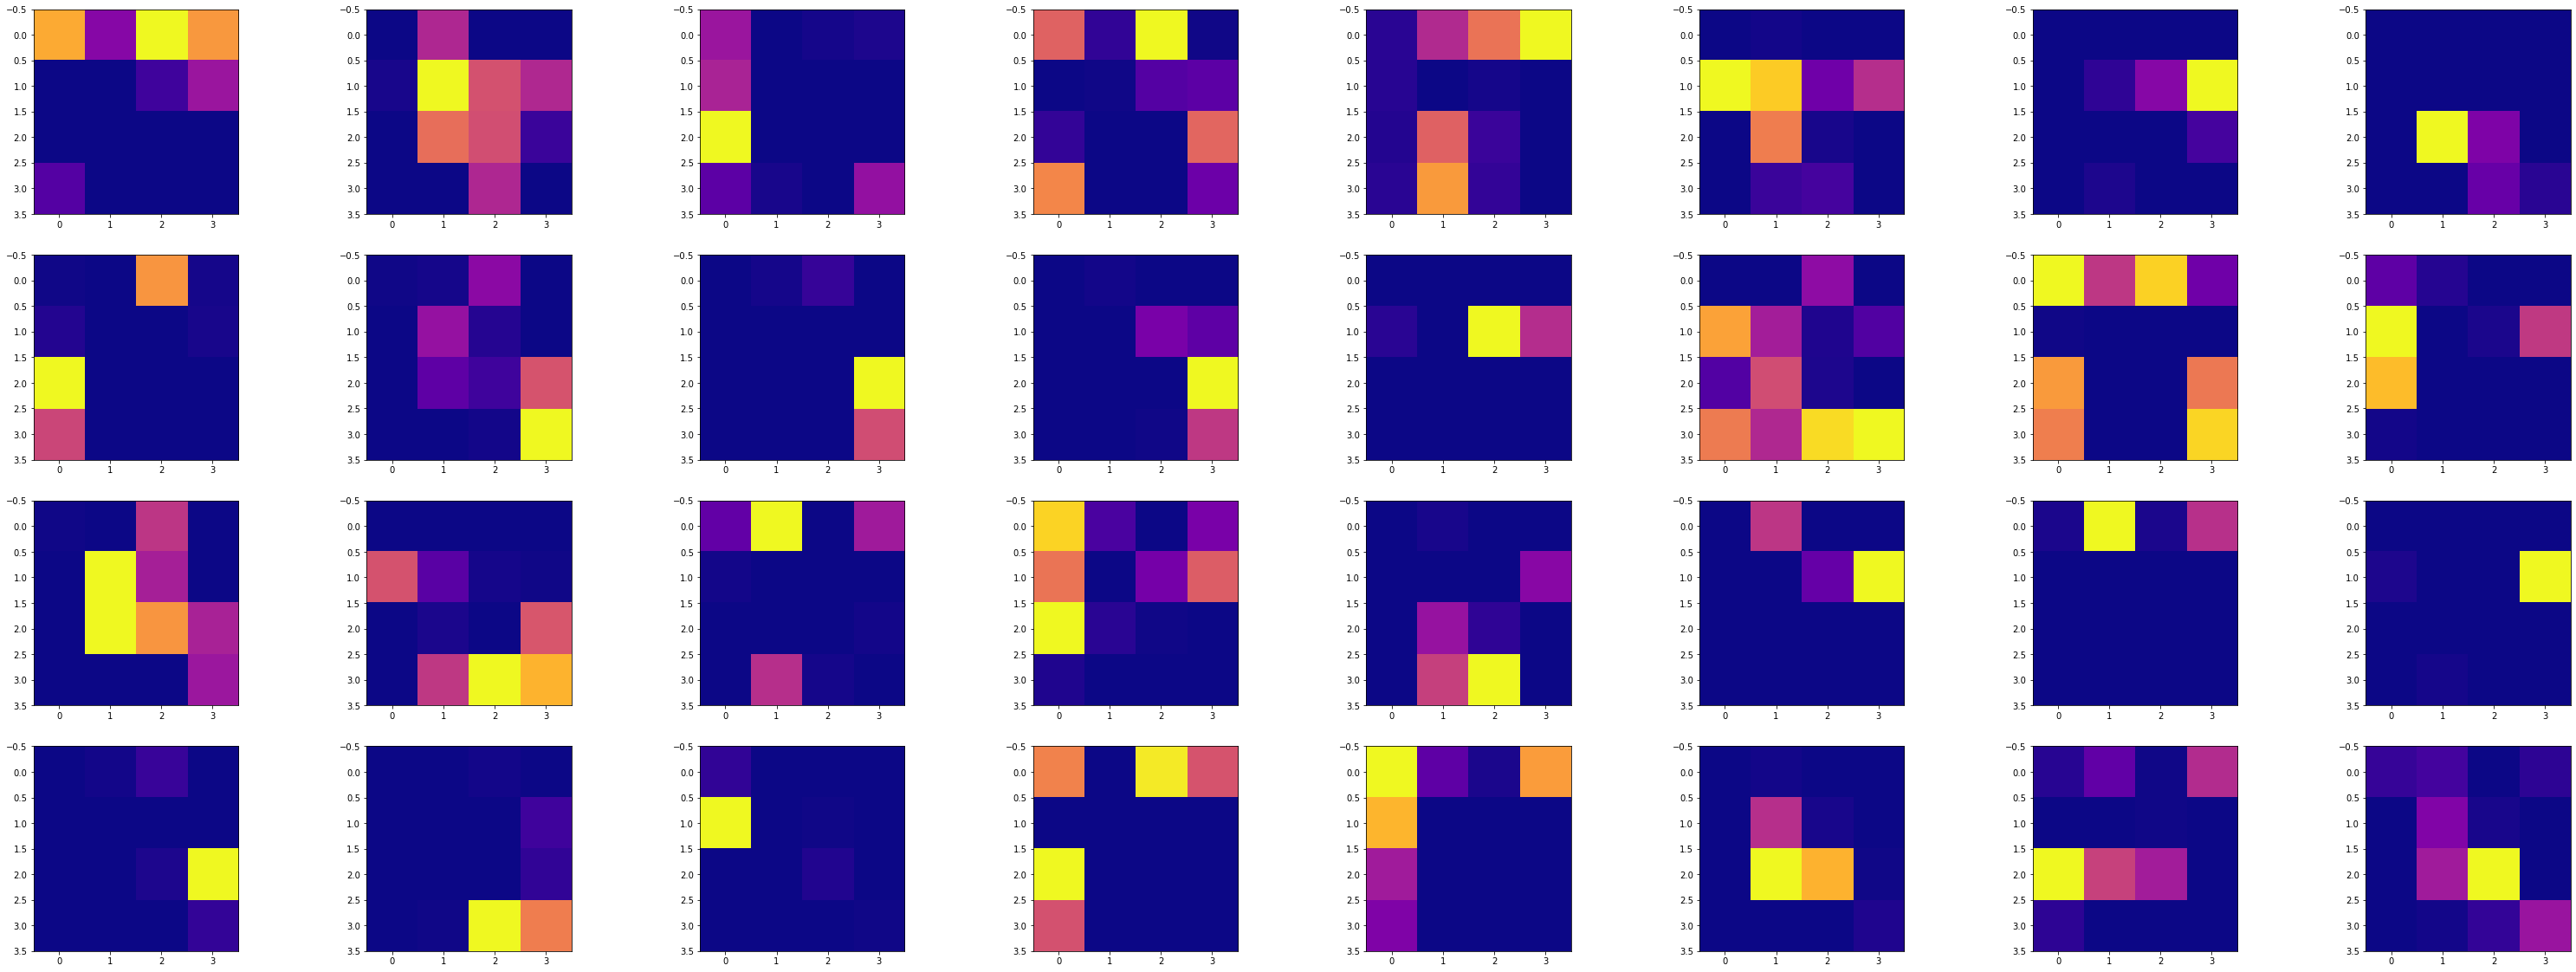

In [33]:
display_activation(activations, 8, 4, 10) # 4ème convolution

In [34]:
# Sauvegarder le modèle
model.save('model_maxime.h5')

In [35]:
# Initialisation du tableau des labels
labels_array = os.listdir(TRAIN_DATA_DIR)

Cet objet est un(e) "bed". probs=  96.59952521324158


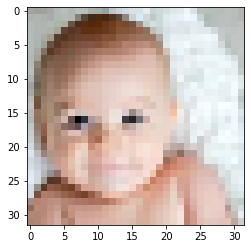

In [43]:
choix = r'./data/validation/bébé-1.png'

test_model = load_model('model_maxime.h5')

test_image = image.load_img(choix, target_size = (32, 32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = test_model.predict(test_image)

preds = test_model.predict_classes(test_image)
prob = test_model.predict_proba(test_image)

index = preds[0]
print(f'Cet objet est un(e) "{labels_array[index]}".', 'probs= ', prob[0][index] * 100)

Cet objet est un(e) "tank". probs=  100.0


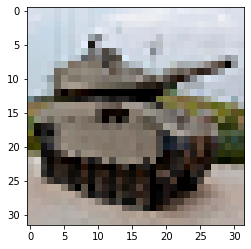

In [44]:
choix = r'./data/validation/tank-1.png'

test_model = load_model('model_maxime.h5')

test_image = image.load_img(choix, target_size = (32, 32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = test_model.predict(test_image)

preds = test_model.predict_classes(test_image)
prob = test_model.predict_proba(test_image)

index = preds[0]
print(f'Cet objet est un(e) "{labels_array[index]}".', 'probs= ', prob[0][index] * 100)

Cet objet est un(e) "bear". probs=  99.97757077217102


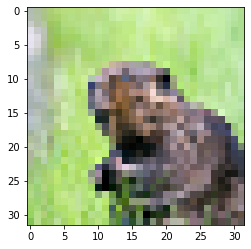

In [45]:
choix = r'./data/validation/castor-1.png'

test_model = load_model('model_maxime.h5')

test_image = image.load_img(choix, target_size = (32, 32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = test_model.predict(test_image)

preds = test_model.predict_classes(test_image)
prob = test_model.predict_proba(test_image)

index = preds[0]
print(f'Cet objet est un(e) "{labels_array[index]}".', 'probs= ', prob[0][index] * 100)

Cet objet est un(e) "bear". probs=  100.0


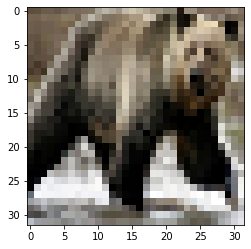

In [46]:
choix = r'./data/validation/ours-1.png'

test_model = load_model('model_maxime.h5')

test_image = image.load_img(choix, target_size = (32, 32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = test_model.predict(test_image)

preds = test_model.predict_classes(test_image)
prob = test_model.predict_proba(test_image)

index = preds[0]
print(f'Cet objet est un(e) "{labels_array[index]}".', 'probs= ', prob[0][index] * 100)

Cet objet est un(e) "aquarium_fish". probs=  99.99992847442627


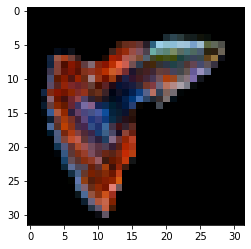

In [50]:
choix = r'./data/validation/poisson-1.png'

test_model = load_model('model_maxime.h5')

test_image = image.load_img(choix, target_size = (32, 32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = test_model.predict(test_image)

preds = test_model.predict_classes(test_image)
prob = test_model.predict_proba(test_image)

index = preds[0]
print(f'Cet objet est un(e) "{labels_array[index]}".', 'probs= ', prob[0][index] * 100)

In [ ]:
choix = r'./data/validation/pomme-1.png'

test_model = load_model('model_maxime.h5')

test_image = image.load_img(choix, target_size = (32, 32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = test_model.predict(test_image)

preds = test_model.predict_classes(test_image)
prob = test_model.predict_proba(test_image)

index = preds[0]
print(f'Cet objet est un(e) "{labels_array[index]}".', 'probs= ', prob[0][index] * 100)

Cet objet est un(e) "tank". probs=  72.61853218078613


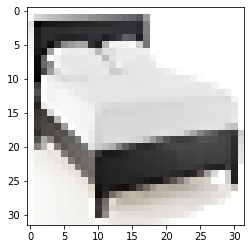

In [49]:
choix = r'./data/validation/lit-1.png'

test_model = load_model('model_maxime.h5')

test_image = image.load_img(choix, target_size = (32, 32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = test_model.predict(test_image)

preds = test_model.predict_classes(test_image)
prob = test_model.predict_proba(test_image)

index = preds[0]
print(f'Cet objet est un(e) "{labels_array[index]}".', 'probs= ', prob[0][index] * 100)